# Notebook 3: This notebook is where I run my unsupervised model

In [273]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from patsy import dmatrix

# open the user dataset from notebook 1
data = pd.read_csv('yelp_users.csv', na_values=[' ?'])
data = data.drop(data.columns[[0]], axis=1)
data.head()

,average_stars,elite,fans,name,review_count,type,user_id,compliment_profile,compliment_cute,compliment_funny,...,compliment_hot,compliment_cool,compliment_more,number_of_friends,number_of_elite_years,vote_funny,vote_useful,vote_cool,total_compliment,yelping_age
0,4.140,"[2005, 2006]",69,Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,8,15,11,...,48,78,3,206,2,166,278,245,232,4017
1,3.640,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,110,209,561,...,1032,1521,129,1904,11,6849,12642,9837,5686,4017
2,3.590,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,Michael,442,user,4U9kSBLuBDU391x6bxU-YA,9,23,122,...,102,145,19,354,11,907,1445,727,639,4017
3,4.640,[],2,Ken,11,user,fHtTaujcyKvXglE33Z5yIw,0,2,0,...,0,0,0,4,0,1,11,5,2,4017
4,3.800,[2005],3,Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,0,2,0,...,1,1,1,4,1,10,34,11,10,4017


In [274]:
# open the new features from notebook 2

new_features = pd.read_csv('yelp_new_features_condensed.csv')
new_features = new_features.drop(new_features.columns[[0]], axis=1)
new_features.head()


,user_id,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review
0,Xqd0DzHaiyRqVH3WRG7hzg,0.000,3.500,9.000,0.000
1,H1kH6QZV7Le4zqTRNxoZow,1040.000,3.500,9.000,1.000
2,zvJCcrpm2yOZrxKffwGQLA,1333.519,3.617,317.185,155.716
3,KBLW4wJA_fwoWmMhiHRVOA,1751.000,3.500,9.000,3.000
4,Qrs3EICADUKNFoUq2iHStA,2164.000,3.500,9.000,5.000


In [275]:
# merge the two datasets to append the new features

full_data = pd.merge(data, new_features, how='left', on='user_id')
full_data.head()

,average_stars,elite,fans,name,review_count,type,user_id,compliment_profile,compliment_cute,compliment_funny,...,number_of_elite_years,vote_funny,vote_useful,vote_cool,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review
0,4.140,"[2005, 2006]",69,Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,8,15,11,...,2,166,278,245,232,4017,7.000,4.000,207.000,1.000
1,3.640,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,110,209,561,...,11,6849,12642,9837,5686,4017,861.964,3.821,587.857,124.964
2,3.590,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,Michael,442,user,4U9kSBLuBDU391x6bxU-YA,9,23,122,...,11,907,1445,727,639,4017,311.000,3.600,338.800,34.400
3,4.640,[],2,Ken,11,user,fHtTaujcyKvXglE33Z5yIw,0,2,0,...,0,1,11,5,2,4017,0.000,4.000,113.500,0.000
4,3.800,[2005],3,Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,0,2,0,...,1,10,34,11,10,4017,0.000,4.000,434.000,0.000


In [276]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 29 columns):
average_stars                     366715 non-null float64
elite                             366715 non-null object
fans                              366715 non-null int64
name                              366715 non-null object
review_count                      366715 non-null int64
type                              366715 non-null object
user_id                           366715 non-null object
compliment_profile                366715 non-null int64
compliment_cute                   366715 non-null int64
compliment_funny                  366715 non-null int64
compliment_plain                  366715 non-null int64
compliment_writer                 366715 non-null int64
compliment_list                   366715 non-null int64
compliment_note                   366715 non-null int64
compliment_photos                 366715 non-null int64
compliment_hot                    366715 no

In [277]:
full_data.describe()

,average_stars,fans,review_count,compliment_profile,compliment_cute,compliment_funny,compliment_plain,compliment_writer,compliment_list,compliment_note,...,number_of_elite_years,vote_funny,vote_useful,vote_cool,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review
count,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,...,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000,366715.000
mean,3.719,1.575,32.215,0.398,0.468,2.712,5.959,2.133,0.217,2.554,...,0.224,29.857,58.980,33.381,26.335,1465.349,1246.208,3.750,344.651,171.365
std,1.030,11.590,94.837,20.571,19.250,48.068,105.259,34.039,13.907,36.622,...,0.948,302.811,405.049,335.355,484.830,714.088,791.719,0.616,558.716,321.469
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,273.000,0.000,1.000,3.000,0.000
25%,3.270,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,883.000,636.000,3.500,43.000,16.000
50%,3.860,0.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,5.000,1.000,0.000,1400.000,1175.000,3.833,128.955,56.333
75%,4.430,1.000,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,6.000,22.000,6.000,2.000,1918.000,1759.677,4.000,371.361,171.500
max,5.000,1298.000,8843.000,9955.000,10473.000,10254.000,19019.000,10167.000,7805.000,10033.000,...,11.000,32747.000,36474.000,32517.000,175944.000,4017.000,3732.000,5.000,4578.000,4136.000


In [278]:
# create a new column to compute total vote

full_data['total_vote'] = full_data.vote_funny + full_data.vote_useful + full_data.vote_cool

In [279]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 30 columns):
average_stars                     366715 non-null float64
elite                             366715 non-null object
fans                              366715 non-null int64
name                              366715 non-null object
review_count                      366715 non-null int64
type                              366715 non-null object
user_id                           366715 non-null object
compliment_profile                366715 non-null int64
compliment_cute                   366715 non-null int64
compliment_funny                  366715 non-null int64
compliment_plain                  366715 non-null int64
compliment_writer                 366715 non-null int64
compliment_list                   366715 non-null int64
compliment_note                   366715 non-null int64
compliment_photos                 366715 non-null int64
compliment_hot                    366715 no

In [280]:
# drop the extra columns

full_data = full_data.drop(full_data.columns[[1, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22]], axis=1)

In [281]:
full_data.head()

,average_stars,fans,name,review_count,user_id,number_of_friends,number_of_elite_years,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
0,4.140,69,Russel,108,18kPq7GPye-YQ3LyKyAZPw,206,2,232,4017,7.000,4.000,207.000,1.000,689
1,3.640,1012,Jeremy,1233,rpOyqD_893cqmDAtJLbdog,1904,11,5686,4017,861.964,3.821,587.857,124.964,29328
2,3.590,93,Michael,442,4U9kSBLuBDU391x6bxU-YA,354,11,639,4017,311.000,3.600,338.800,34.400,3079
3,4.640,2,Ken,11,fHtTaujcyKvXglE33Z5yIw,4,0,2,4017,0.000,4.000,113.500,0.000,17
4,3.800,3,Katherine,66,SIBCL7HBkrP4llolm4SC2A,4,1,10,4017,0.000,4.000,434.000,0.000,55


In [306]:
# save the full data to csv

full_data.to_csv('full_data.csv')

In [321]:
# create a patsy

full_matrix = dmatrix('0 + average_stars + fans + review_count + yelping_age + number_of_friends + number_of_elite_years + + total_compliment + review_age_days_mean + stars_business + review_count_business_average + num_reviews_before_user_review + total_vote', full_data, return_type='dataframe')

In [322]:
full_matrix.head()

,average_stars,fans,review_count,yelping_age,number_of_friends,number_of_elite_years,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
0,4.140,69.000,108.000,4017.000,206.000,2.000,232.000,7.000,4.000,207.000,1.000,689.000
1,3.640,1012.000,1233.000,4017.000,1904.000,11.000,5686.000,861.964,3.821,587.857,124.964,29328.000
2,3.590,93.000,442.000,4017.000,354.000,11.000,639.000,311.000,3.600,338.800,34.400,3079.000
3,4.640,2.000,11.000,4017.000,4.000,0.000,2.000,0.000,4.000,113.500,0.000,17.000
4,3.800,3.000,66.000,4017.000,4.000,1.000,10.000,0.000,4.000,434.000,0.000,55.000


In [323]:
# in this series of code, I'm examining the outliers

full_data.loc[full_data['total_compliment'] == 175944]


,average_stars,fans,name,review_count,user_id,number_of_friends,number_of_elite_years,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
33316,4.280,169,Brian,1628,ftm0zhX_fQDzAed8ESTlkA,63,0,175944,2495,769.500,3.250,493.500,69.000,88367


In [324]:
full_data.loc[full_data['review_count'] == 8843]


,average_stars,fans,name,review_count,user_id,number_of_friends,number_of_elite_years,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
153645,3.270,463,Victor,8843,JLM36sYWmouJAZ2knzst7A,668,8,8777,2861,1005.667,3.250,1179.333,88.500,69038


In [325]:
full_data.loc[full_data['fans'] == 1298]

,average_stars,fans,name,review_count,user_id,number_of_friends,number_of_elite_years,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
4518,4.140,1298,Jessica,1647,7uxXuCcpw9-mUS3OJVw8aQ,1868,11,22969,3744,656.737,3.789,389.842,32.947,86200


In [326]:
full_data.loc[full_data['number_of_friends'] == 3830]


,average_stars,fans,name,review_count,user_id,number_of_friends,number_of_elite_years,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
89099,3.910,140,Philip,727,WmAyExqSWoiYZ5XEqpk_Uw,3830,7,3711,3044,620.944,3.733,321.269,57.815,14583


In [327]:
full_data.loc[full_data['number_of_elite_years'] == 11]

,average_stars,fans,name,review_count,user_id,number_of_friends,number_of_elite_years,total_compliment,yelping_age,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
1,3.640,1012,Jeremy,1233,rpOyqD_893cqmDAtJLbdog,1904,11,5686,4017,861.964,3.821,587.857,124.964,29328
2,3.590,93,Michael,442,4U9kSBLuBDU391x6bxU-YA,354,11,639,4017,311.000,3.600,338.800,34.400,3079
5,4.350,777,Joan,1589,8J4IIYcqBlFch8T90N923A,1094,11,16276,4017,0.000,4.000,8.000,0.000,45567
1083,4.090,467,Nish,1830,i63u3SdbrLsP4FxiSKP0Zw,1087,11,5995,3956,534.095,3.762,759.333,27.286,29536
2443,3.790,113,Gil,1031,9A8OuP6XwLwnNb9ov3_Ncw,126,11,1330,3866,96.400,3.900,1708.000,2.600,7413
2808,3.420,438,Anita,3865,pz97SxRe1Vk-5_K6EB9OSA,627,11,8116,3835,513.336,3.569,346.427,26.061,49366
3791,3.830,165,Maria,1110,Rq8grR5mxEM610EI9GaL6g,103,11,2719,3774,1179.529,3.485,1137.618,292.941,16009
4428,3.660,99,Andrew,3478,7FuLnS_-b79GG-33mwLaMg,207,11,585,3744,1202.561,3.492,732.061,183.682,6840
4518,4.140,1298,Jessica,1647,7uxXuCcpw9-mUS3OJVw8aQ,1868,11,22969,3744,656.737,3.789,389.842,32.947,86200
4873,3.780,137,Jordan,1629,K2PDI4_GJLUTwjq0jA2viQ,121,11,1036,3713,879.000,2.500,497.500,14.000,8017


In [328]:
scale = StandardScaler()

In [329]:
X_scale = scale.fit(full_matrix).transform(full_matrix)

In [330]:
# I ran this code dozens of times. I decided that the optimum number of clusters is 6.

%%time
km = KMeans(n_clusters=6)
km.fit(X_scale)

CPU times: user 18.1 s, sys: 2.85 s, total: 20.9 s
Wall time: 18.2 s


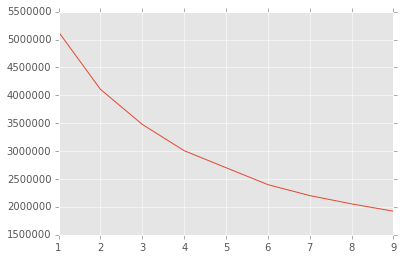

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,10):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_scale)
    x.append(n)
    y.append(km2.inertia_)
plt.plot(x, y)

In [332]:
# transforms data to non-scientific numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# get the cluster centers in the original scale
# this means you will have k cluster centers
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,6)}
pd.DataFrame(columns, index=full_matrix.columns)

,0,1,2,3,4,5
average_stars,4.219,3.672,3.761,2.568,3.803,3.878
fans,0.560,1.060,15.082,0.265,100.208,492.711
review_count,17.833,34.045,285.369,11.329,784.812,1582.289
yelping_age,1472.716,1581.239,2333.696,1243.588,2560.881,2873.301
number_of_friends,3.948,5.189,51.866,1.755,408.791,1051.964
number_of_elite_years,0.039,0.114,3.769,0.014,5.357,6.892
total_compliment,3.255,7.236,217.694,1.484,3360.967,18204.651
review_age_days_mean,1071.424,2015.736,1247.001,1384.476,1184.554,1060.118
stars_business,4.006,3.718,3.673,3.184,3.647,3.690
review_count_business_average,198.862,1693.558,604.104,164.971,653.767,569.878


In [333]:
# see the number of users in each segment

full_matrix['segments'] = km.labels_
full_matrix.segments.value_counts()

0    220668
3     95239
1     33093
2     16611
4      1021
5        83
dtype: int64

In [302]:
# checking data

full_matrix[full_matrix.segments == 5].head()

,average_stars,fans,review_count,yelping_age,number_of_friends,number_of_elite_years,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote,segments
1,3.640,1012.000,1233.000,4017.000,1904.000,11.000,5686.000,861.964,3.821,587.857,124.964,29328.000,5
5,4.350,777.000,1589.000,4017.000,1094.000,11.000,16276.000,0.000,4.000,8.000,0.000,45567.000,5
1083,4.090,467.000,1830.000,3956.000,1087.000,11.000,5995.000,534.095,3.762,759.333,27.286,29536.000,5
1278,3.770,143.000,1321.000,1918.000,704.000,6.000,16476.000,1495.000,3.750,29.500,23.000,72703.000,5
2537,3.860,1119.000,1199.000,3866.000,1227.000,10.000,13378.000,340.286,3.929,31.857,11.714,35604.000,5


In [334]:
# save to csv 

full_matrix.to_csv('full_matrix.csv')

# I decided to do PCA for fun, but it's not part of my main project

In [293]:
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
pca = RandomizedPCA(n_components=2)
pca.fit(X_scale)

RandomizedPCA(copy=True, iterated_power=3, n_components=2, random_state=None,
       whiten=False)

In [295]:
pca.explained_variance_ratio_

array([ 0.32251898,  0.17294123])

In [296]:
comp = pca.components_
zip(comp[0], comp[1])

[(0.0064042925199999092, -0.087654363076514752),
 (0.4422212827236775, -0.072726773440564552),
 (0.40991018945828278, 0.01663693273201107),
 (0.16661018902359337, 0.046422314521798028),
 (0.38428460528300751, -0.058206220572241819),
 (0.34673916396362314, 0.019220489940872672),
 (0.34813392621141476, -0.087260963344556838),
 (0.010433180075646942, 0.40638741237445752),
 (-0.017512431103421548, -0.088558689465038504),
 (0.096720850823189153, 0.61614157896062183),
 (0.057743074608479231, 0.64304441115953015),
 (0.45432295257163935, -0.084225368552627536)]

In [297]:
trans = pca.fit_transform(X_scale)

In [298]:
trans

array([[  6.38294077,  -1.78189534],
       [ 83.48847079, -11.93893653],
       [ 14.84287754,  -1.70302761],
       ..., 
       [ -0.72760835,  -0.58510639],
       [ -0.73977118,  -0.55107437],
       [ -0.70981944,   0.44897274]])

IndexError: index 12 is out of bounds for axis 0 with size 12

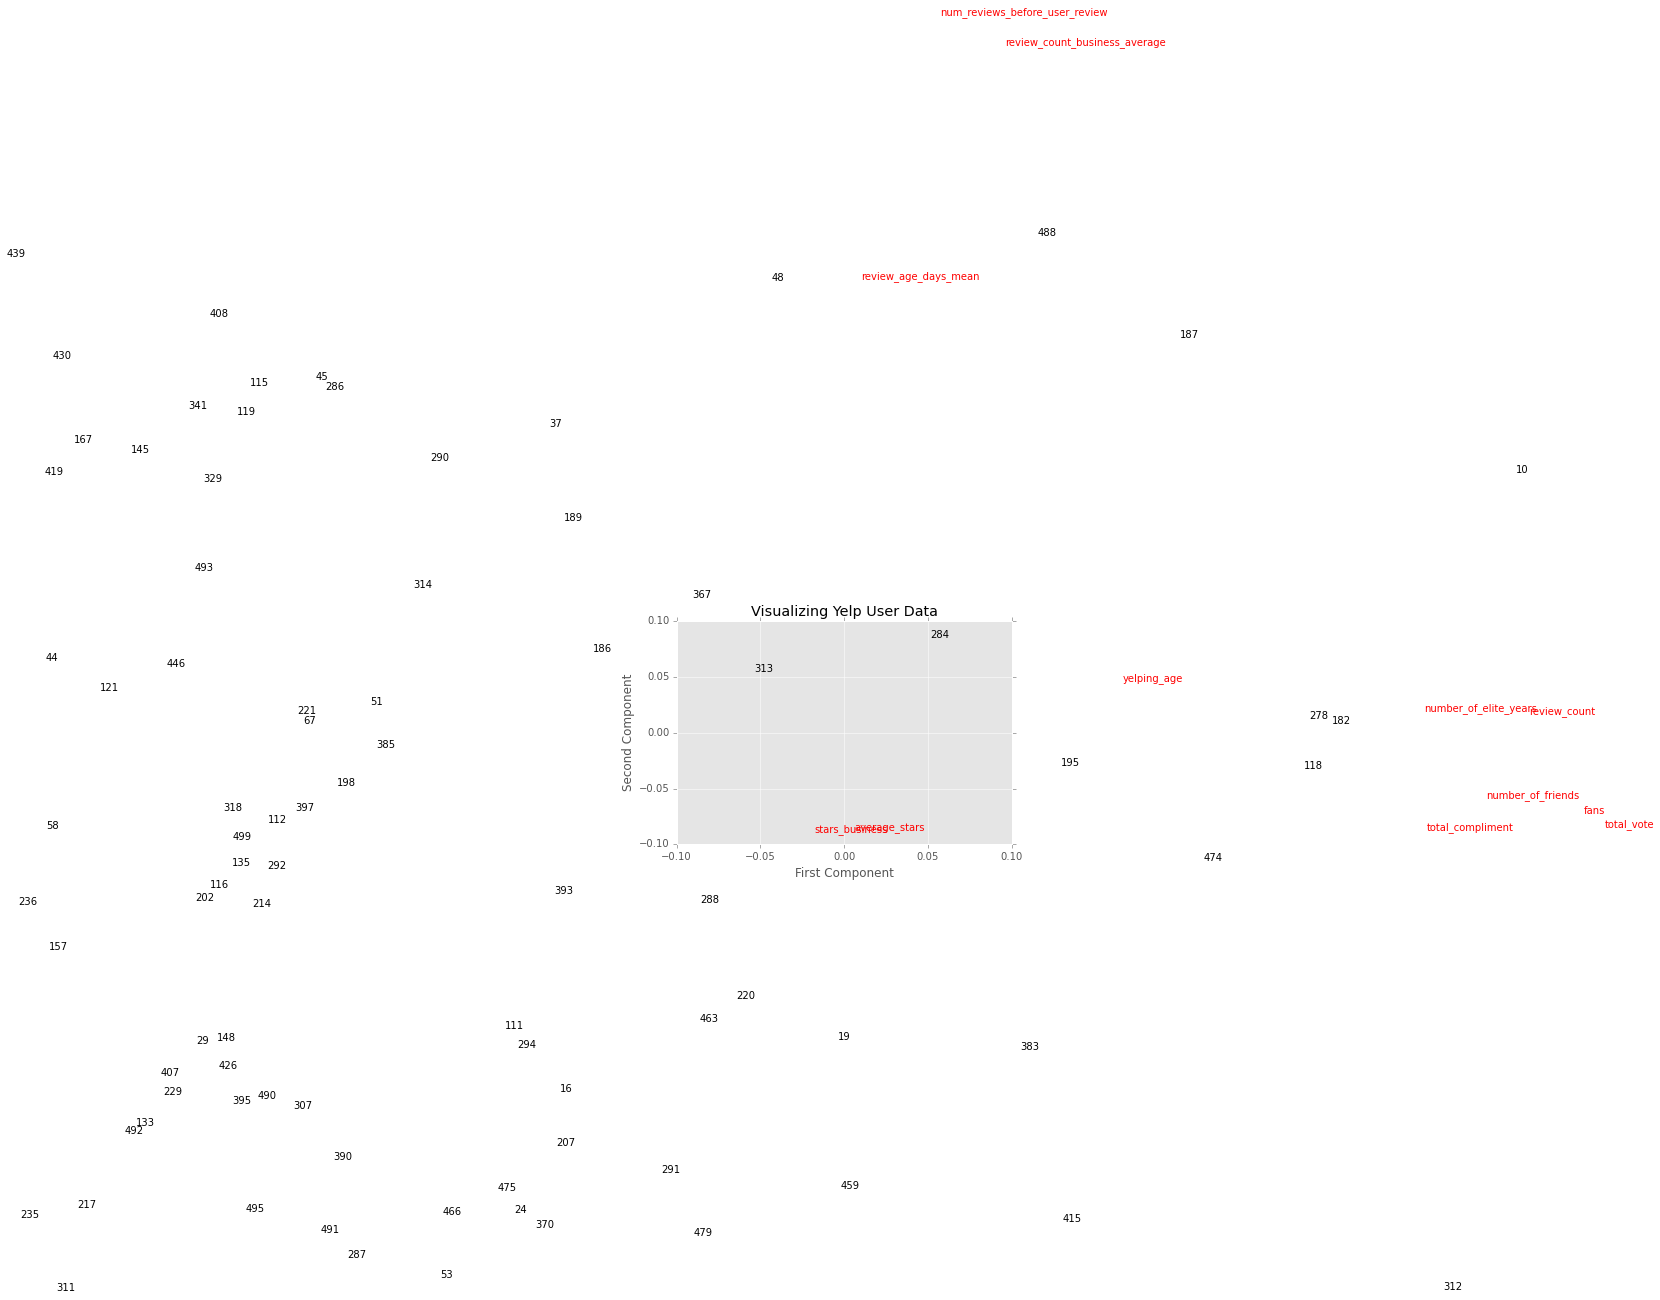

In [304]:
plt.style.use('ggplot')
plt.title('Visualizing Yelp User Data')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.xlim(-.1, .1)
plt.ylim(-.1, .1)
for index, state in enumerate(full_matrix.index):
    if index < 500:
        if trans[index][0] < .5 and trans[index][0] > -.5 and trans[index][1] <.5 and trans[index][1] > -.5:
            plt.text(trans[index][0], trans[index][1], state)
for index, feature in enumerate(full_matrix.columns):
    plt.text(comp[0][index], comp[1][index], feature, color='red')
for index, feature in enumerate(full_matrix.columns):
    plt.arrow(0, 0, comp[0][index], comp[1][index], feature, color='red',
             fc="k", ec="k",head_width=0.05, head_length=0.1)

# I decided to re-run the model, taking out elite years. I *might* use this result for my clustering instead. But the main method remains the same, the only difference is the elite_years

In [355]:
full_matrix2 = dmatrix('0 + average_stars + fans + review_count + yelping_age + number_of_friends + total_compliment + review_age_days_mean + stars_business + review_count_business_average + num_reviews_before_user_review + total_vote', full_data, return_type='dataframe')

In [356]:
full_matrix2.head()

,average_stars,fans,review_count,yelping_age,number_of_friends,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote
0,4.140,69.000,108.000,4017.000,206.000,232.000,7.000,4.000,207.000,1.000,689.000
1,3.640,1012.000,1233.000,4017.000,1904.000,5686.000,861.964,3.821,587.857,124.964,29328.000
2,3.590,93.000,442.000,4017.000,354.000,639.000,311.000,3.600,338.800,34.400,3079.000
3,4.640,2.000,11.000,4017.000,4.000,2.000,0.000,4.000,113.500,0.000,17.000
4,3.800,3.000,66.000,4017.000,4.000,10.000,0.000,4.000,434.000,0.000,55.000


In [357]:
scale = StandardScaler()

In [358]:
X_scale = scale.fit(full_matrix2).transform(full_matrix2)

In [359]:
%%time
km = KMeans(n_clusters=6)
km.fit(X_scale)

CPU times: user 28.4 s, sys: 3.35 s, total: 31.7 s
Wall time: 31.5 s


In [360]:
# transforms data to non-scientific numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# get the cluster centers in the original scale
# this means you will have k cluster centers
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,6)}
pd.DataFrame(columns, index=full_matrix2.columns)

,0,1,2,3,4,5
average_stars,2.342,3.669,3.860,3.762,3.784,4.369
fans,0.148,1.480,348.286,47.635,2.268,0.218
review_count,7.250,40.773,1307.857,578.838,58.317,8.641
yelping_age,1109.351,1532.167,2700.631,2492.395,2228.471,1059.152
number_of_friends,1.306,6.491,932.929,187.858,9.251,2.623
total_compliment,0.741,12.305,13617.381,1173.825,19.785,1.268
review_age_days_mean,1371.388,2044.584,1151.736,1181.096,1119.368,1115.808
stars_business,3.153,3.717,3.685,3.650,3.710,4.086
review_count_business_average,143.781,1766.538,610.236,648.062,352.059,146.795
num_reviews_before_user_review,85.199,1011.929,210.282,219.913,115.776,84.308


In [361]:
full_matrix2['segments'] = km.labels_
full_matrix2.segments.value_counts()

5    150441
4    106902
0     75136
1     30117
3      3951
2       168
dtype: int64

In [362]:
full_matrix2.head()

,average_stars,fans,review_count,yelping_age,number_of_friends,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote,segments
0,4.140,69.000,108.000,4017.000,206.000,232.000,7.000,4.000,207.000,1.000,689.000,3
1,3.640,1012.000,1233.000,4017.000,1904.000,5686.000,861.964,3.821,587.857,124.964,29328.000,2
2,3.590,93.000,442.000,4017.000,354.000,639.000,311.000,3.600,338.800,34.400,3079.000,3
3,4.640,2.000,11.000,4017.000,4.000,2.000,0.000,4.000,113.500,0.000,17.000,4
4,3.800,3.000,66.000,4017.000,4.000,10.000,0.000,4.000,434.000,0.000,55.000,4


In [363]:
full_matrix2[full_matrix2.segments == 2].head(50)

,average_stars,fans,review_count,yelping_age,number_of_friends,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote,segments
1,3.640,1012.000,1233.000,4017.000,1904.000,5686.000,861.964,3.821,587.857,124.964,29328.000,2
5,4.350,777.000,1589.000,4017.000,1094.000,16276.000,0.000,4.000,8.000,0.000,45567.000,2
1083,4.090,467.000,1830.000,3956.000,1087.000,5995.000,534.095,3.762,759.333,27.286,29536.000,2
1278,3.770,143.000,1321.000,1918.000,704.000,16476.000,1495.000,3.750,29.500,23.000,72703.000,2
1355,3.820,114.000,401.000,2525.000,182.000,20181.000,1298.500,4.000,1285.750,240.250,18688.000,2
2537,3.860,1119.000,1199.000,3866.000,1227.000,13378.000,340.286,3.929,31.857,11.714,35604.000,2
2808,3.420,438.000,3865.000,3835.000,627.000,8116.000,513.336,3.569,346.427,26.061,49366.000,2
3073,3.870,704.000,1196.000,3835.000,1200.000,16177.000,3.000,4.000,18.000,1.000,55187.000,2
3786,4.260,372.000,754.000,3774.000,913.000,2601.000,609.591,3.727,416.727,33.727,8779.000,2
4159,3.910,319.000,2823.000,3744.000,1895.000,3531.000,506.257,3.400,520.886,33.714,43797.000,2


In [365]:
full_matrix2.to_csv('full_matrix2.csv')